In [2]:
import pandas as pd
import chess.pgn

# Load the PGN file containing the Lichess games
pgn_file = open('lichess_sseth333_games.pgn')

games = []

# Loop through each game in the PGN file
while True:
    # Read in the next game from the PGN file
    game = chess.pgn.read_game(pgn_file)
    if game is None:
        break
    
    # Extract the game data and append it to the list
    games.append({
        'Event': game.headers['Event'],
        'Site': game.headers['Site'],
        'Date': game.headers['Date'],
        'White': game.headers['White'],
        'Black': game.headers['Black'],
        'Result': game.headers['Result'],
        'UTCTime': game.headers['UTCTime'],
        'UTCDate': game.headers['UTCDate'],
#         'WhiteRatingDiff': game.headers['WhiteRatingDiff'],
#         'BlackRatingDiff': game.headers['BlackRatingDiff'],
        'Variant': game.headers['Variant'],
        'TimeControl': game.headers['TimeControl'],
        'ECO': game.headers['ECO'],
        'Termination': game.headers['Termination'],
        'Opening': game.headers['Opening'],
        'Moves': game.mainline_moves()
    })

# Convert the list of games to a pandas DataFrame
df = pd.DataFrame(games)

In [4]:
# Convert the Date column to a pandas datetime object
df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m.%d')

# Group the games by date and count the number of games played on each day
games_by_date = df.groupby('Date')['Date'].count()

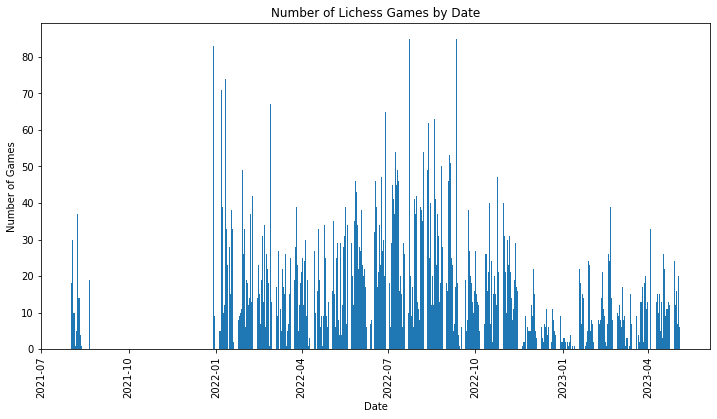

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create a bar plot of the number of games by date
plt.bar(games_by_date.index, games_by_date.values)

plt.title('Number of Lichess Games by Date')
plt.xlabel('Date')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

In [9]:
df['Opening'].value_counts()

Benoni Defense: Old Benoni                                     835
Sicilian Defense: Old Sicilian                                 469
English Opening: Agincourt Defense                             432
Sicilian Defense: LÃ¶wenthal Variation                         356
English Opening: Anglo-Scandinavian Defense                    334
                                                              ... 
Four Knights Game: Gunsberg Variation                            1
Polish Opening: Czech Defense                                    1
Queen's Gambit Accepted: Rosenthal Variation                     1
English Opening: Four Knights System, Nimzowitsch Variation      1
Dutch Defense: Raphael Variation                                 1
Name: Opening, Length: 227, dtype: int64

In [10]:
df['Result'].value_counts()

1-0        4464
0-1        3912
1/2-1/2     432
Name: Result, dtype: int64

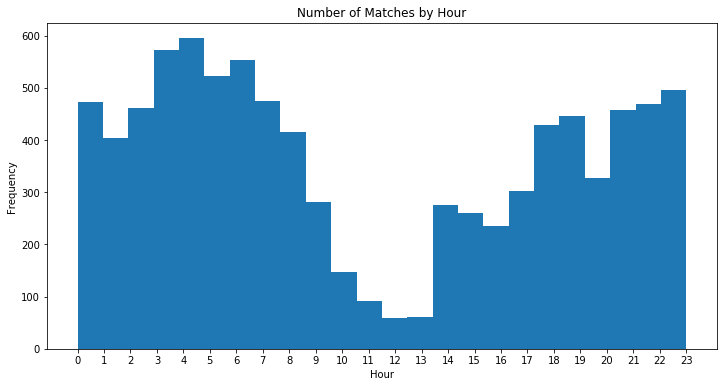

In [11]:
df['Hour'] = pd.to_datetime(df['UTCTime']).dt.hour

plt.figure(figsize=(12, 6))

plt.hist(df['Hour'], bins=24)

plt.title('Number of Matches by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(range(24))
plt.show()

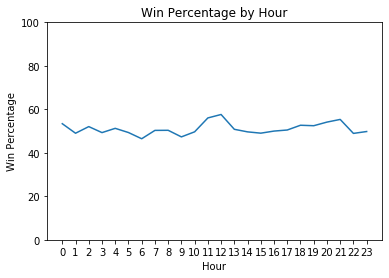

In [22]:
# Extract the hour from the Time column
df['Hour'] = pd.to_datetime(df['UTCTime']).dt.hour

# Calculate win percentage by hour
win_percentage = df.groupby('Hour')['Result'].apply(lambda x: (x == '1-0').sum() / len(x)*100)
win_percentage = dict(win_percentage)

# Plot the win percentage by hour
plt.plot(list(win_percentage.keys()), list(win_percentage.values()))

# Set the title and axis labels
plt.title('Win Percentage by Hour')
plt.xlabel('Hour')
plt.ylabel('Win Percentage')

# Set x-axis ticks to show the 24 hours
plt.xticks(range(24))

plt.ylim(0, 100)
plt.show()